### Problem Statement

Dream Housing Finance company deals in all kinds of home loans. They have a presence across all urban, semi-urban, and rural areas. The customer first applies for a home loan and after that, the company validates the customer's eligibility for a loan.

The Company wants to automate the loan eligibility process (real-time) based on customer details provided while filling out the o online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit history, and others. To automate this process, they have provided a dataset to identify the customer segment eligible for loan amounts to specifically target these customers.. 

In [1]:
# Import neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Training and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# saving
import joblib
import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Import the dataset
df = pd.read_csv(r"C:\Users\Harrison\Downloads\Train Dataset.csv")

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Data Dictionary

The dataset contains the following columns:
- Loan_ID: Unique identifier for each loan application.
- Gender: Gender of the applicant.
- Married: Marital status of the applicant.
- Dependents: Number of dependents.
- Education: Educational background of the applicant.
- Self_Employed: Whether the applicant is self-employed.
- ApplicantIncome: Applicant's income.
- CoapplicantIncome: Co-applicant's income.
- LoanAmount: Loan amount in thousands.
- Loan_Amount_Term: Term of the loan in months.
- Credit_History: Credit history meets guidelines.
- Property_Area: Urban, Semi-Urban, or Rural.
- Loan_Status: (Target) Whether the loan was approved (Y/N)proved (Y/N)approved (Y/N)

### Data Investigation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Statistical Analysis of the data**

In [4]:
# Descriptive statistic of the numerical features
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- ApplicantIncome has a wide range, with a maximum value of 81,000 and a mean of around 5,403.
- CoapplicantIncome also varies significantly, with a mean of about 1,621.
- LoanAmount ranges from 9 to 700, with a mean of approximately 146.
- Loan_Amount_Term mostly has values around 360 months (30 years).
- Credit_History is a binary feature with a mean close to 0.85, indicating most applicants have a good credit history.

In [5]:
# Descriptive statistic of the categorical features
df.describe(exclude =('int64', 'float64'))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


- Gender: Majority are Male (502 out of 614).
- Married: Most applicants are Married (401 out of 614).
- Dependents: Majority have 0 dependents (360 out of 614).
- Education: Majority are Graduates (480 out of 614).
- Self_Employed: Most are not self-employed (532 out of 614).
- Property_Area: Most applicants are from Semiurban areas (233 out of 614).
- Loan_Status: Majority of loans were approved (422 out of 614).

In [6]:
# Check for missing values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

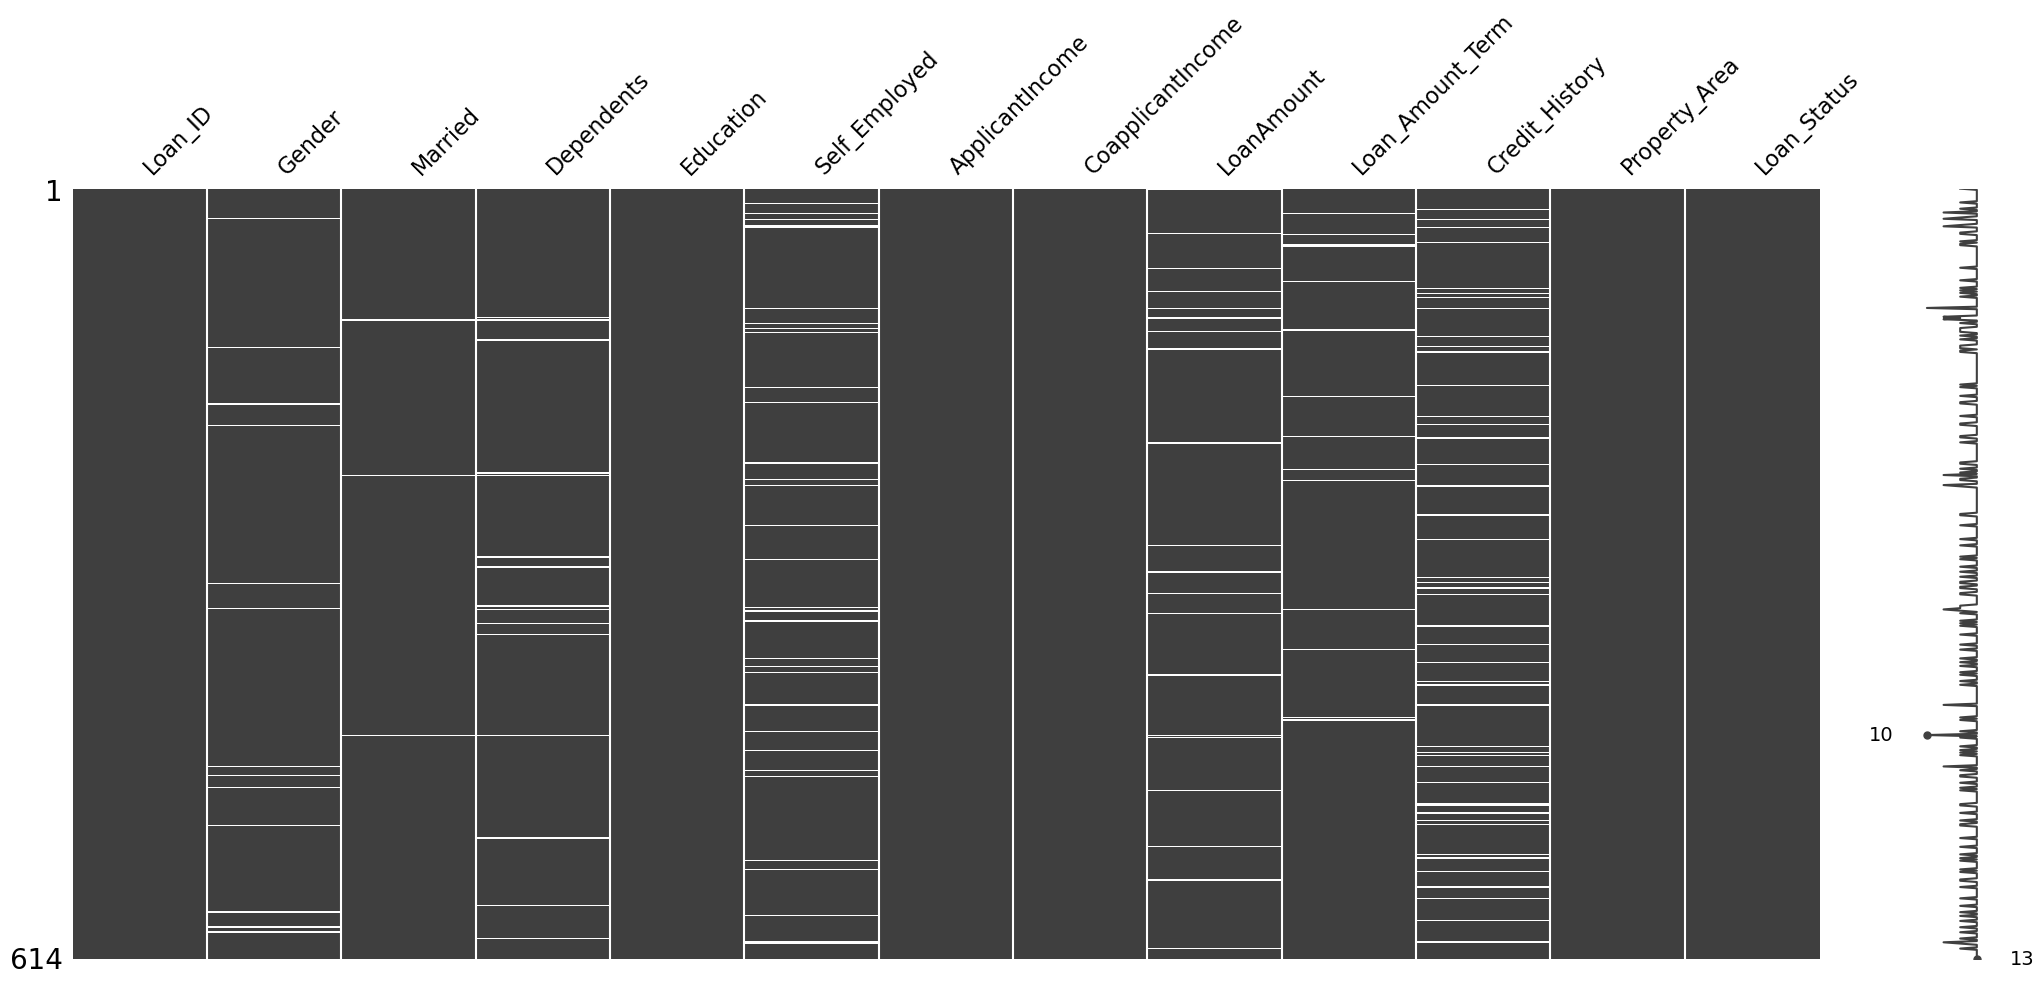

In [7]:
# Visualizing the missing data
import missingno as msno

# Visualize nullity patterns
msno.matrix(df)


The dataset contains missing values in several columns:

- Gender: 13 missing values
- Married: 3 missing values
- Dependents: 15 missing values
- Self_Employed: 32 missing values
- LoanAmount: 22 missing values
- Loan_Amount_Term: 14 missing values
- Credit_History: 50 missing values

We'll handle these missing values using appropriate strategies. Here are the common approaches we can use:

- For categorical variables, we can impute missing values with the mode.
- For numerical variables, we can impute missing values with the mean or median.

In [8]:
# Check for duplicates
df.duplicated().any().sum()

0

There are no duplicates in our data

### Data Pre-processing

In [9]:
# Drop redundant columns, eg. Loan_ID 

df.drop('Loan_ID', axis ='columns', inplace=True)

In [10]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Handling the missing values

In [11]:
# Impute missing values for categorical variables with the mode
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Impute missing values for numerical variables with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Verify that there are no missing values left
missing_values_after = df.isnull().sum()
missing_values_after


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All missing valeus have been filled

### Exploratory Data Analysis (EDA)- 
Exploratory Data Analysis (EDA) is a crucial step in any data analysis project. It involves summarizing the main characteristics of the data and visualizing them to gain insights
- Univariate analysis
- Bivariate analysis
- Multivariate analysis.

#### Univariate Analysis
- Exploring the distribution of individual features

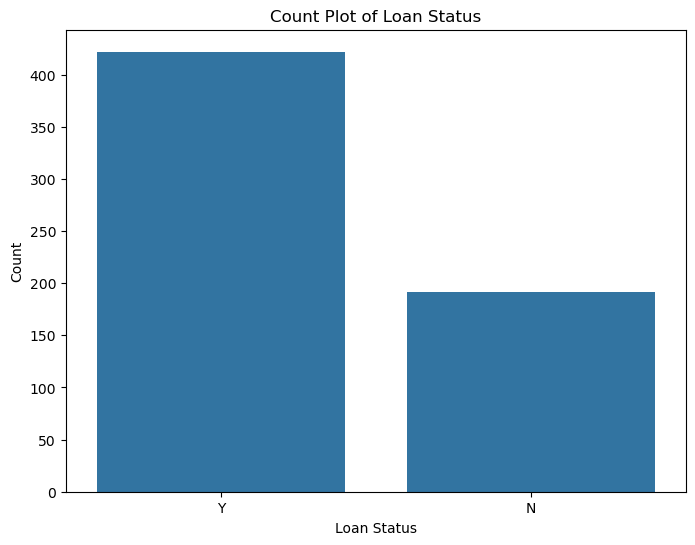

Value counts of loan status:
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [12]:
# Count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=df)
plt.title('Count Plot of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# Value counts
value_counts = df['Loan_Status'].value_counts()
print("Value counts of loan status:")
print(value_counts)


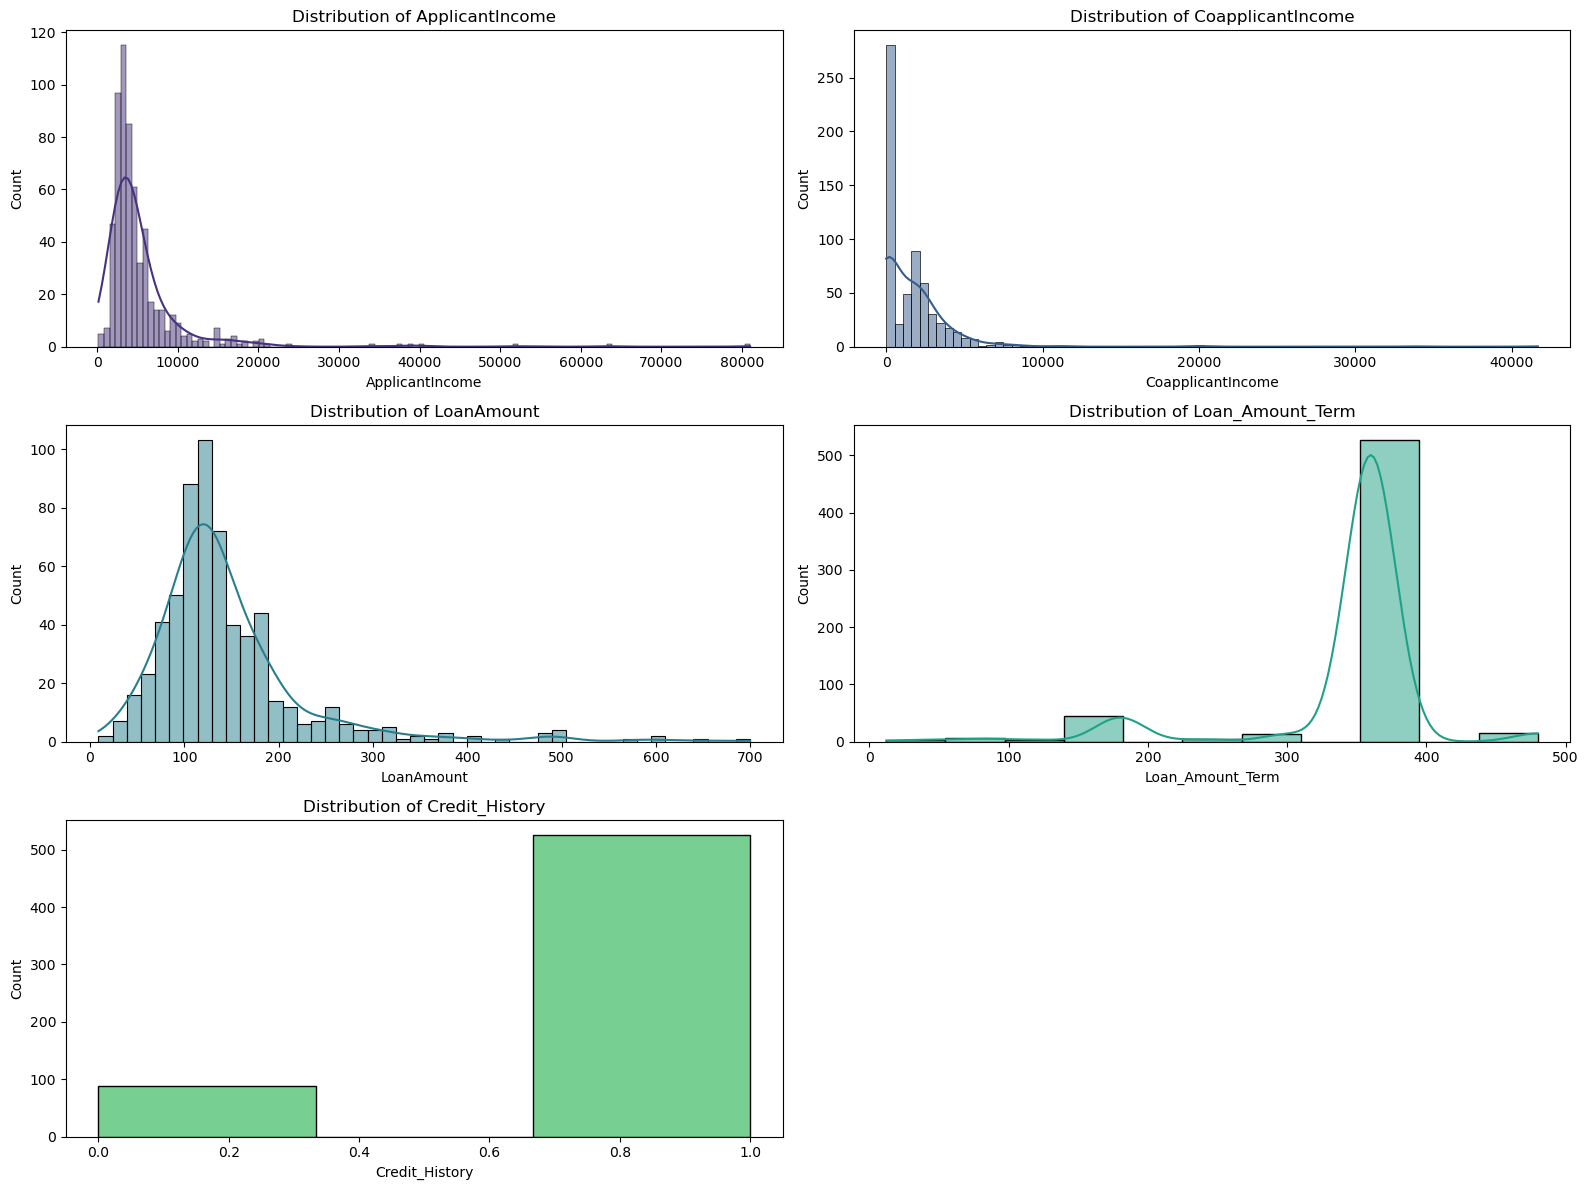

In [13]:
# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Extract viridis palette colors
viridis_colors = sns.color_palette('viridis', as_cmap=False)

# Plot histograms with similar colors to viridis palette
sns.histplot(df['ApplicantIncome'], kde=True, ax=axes[0, 0], color=viridis_colors[0])
axes[0, 0].set_title('Distribution of ApplicantIncome')

sns.histplot(df['CoapplicantIncome'], kde=True, ax=axes[0, 1], color=viridis_colors[1])
axes[0, 1].set_title('Distribution of CoapplicantIncome')

sns.histplot(df['LoanAmount'], kde=True, ax=axes[1, 0], color=viridis_colors[2])
axes[1, 0].set_title('Distribution of LoanAmount')

sns.histplot(df['Loan_Amount_Term'], kde=True, ax=axes[1, 1], color=viridis_colors[3])
axes[1, 1].set_title('Distribution of Loan_Amount_Term')

sns.histplot(df['Credit_History'], kde=False, ax=axes[2, 0], bins=3, color=viridis_colors[4])
axes[2, 0].set_title('Distribution of Credit_History')

# Remove the empty subplot
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


We can observe the following from the histogram for numerical features:

- ApplicantIncome: Skewed to the right, indicating that most applicants have incomes on the lower end with a few high-income outliers.
- CoapplicantIncome: Also right-skewed, with many applicants having zero or low coapplicant income.
- LoanAmount: Skewed to the right, with most loans being smaller and a few large loan outliers.
- Loan_Amount_Term: The most common value is 360 months, indicating many 30-year loans.
- Credit_History: Most applicants have a credit history score of 1, indicating good credit history.

We can also observe from our visualization that there are some extreme values or outliers in some our numerical features ('ApplicantIncome', 'CoapplicantIncome', 'LoanAmount')

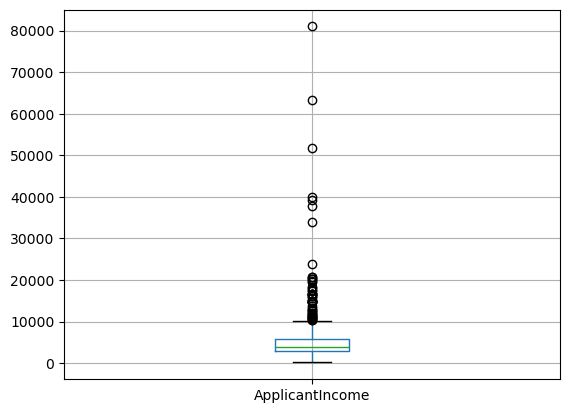

In [14]:
# Visualizing the outliers in ApplicantIncome
df.boxplot(column='ApplicantIncome')

plt.show()

This confirms the presence of a lot of outliers. This could be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

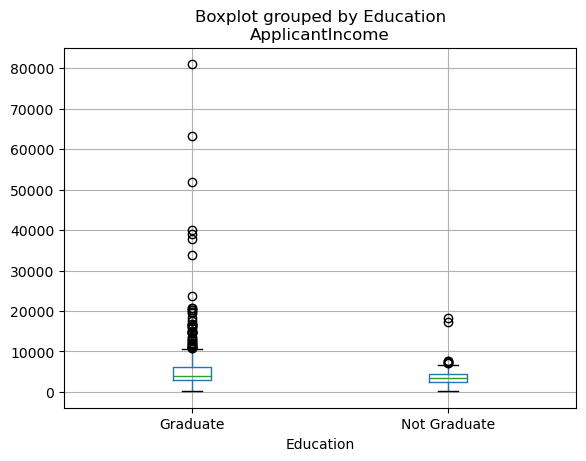

In [15]:
df.boxplot(column='ApplicantIncome', by = 'Education')
plt.show()

From our visiualization we can see that there is no substantial difference betweeen the mean income of graduates and non-graduates. But there are higher number of graduates with very high incomes, which appears to be the outliers

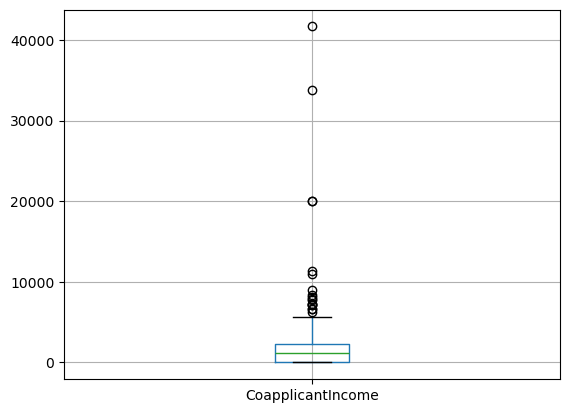

In [16]:
# Visualizing the outliers in CoapplicantIncome

df.boxplot(column='CoapplicantIncome')
plt.show()

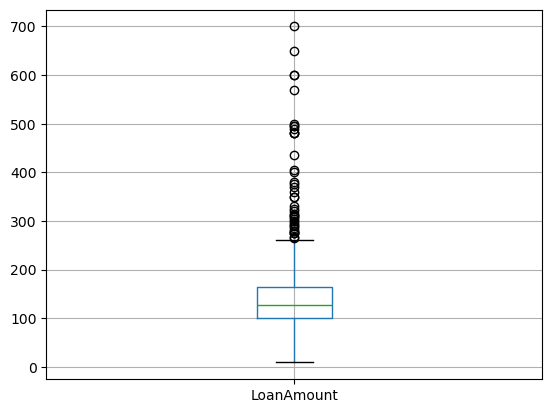

In [17]:
# Visualizing the outliers in LoanAmount

df.boxplot(column='LoanAmount')
plt.show()

The LoanAmount contains a lot of extreme values or outliers as well. We will take care of this later

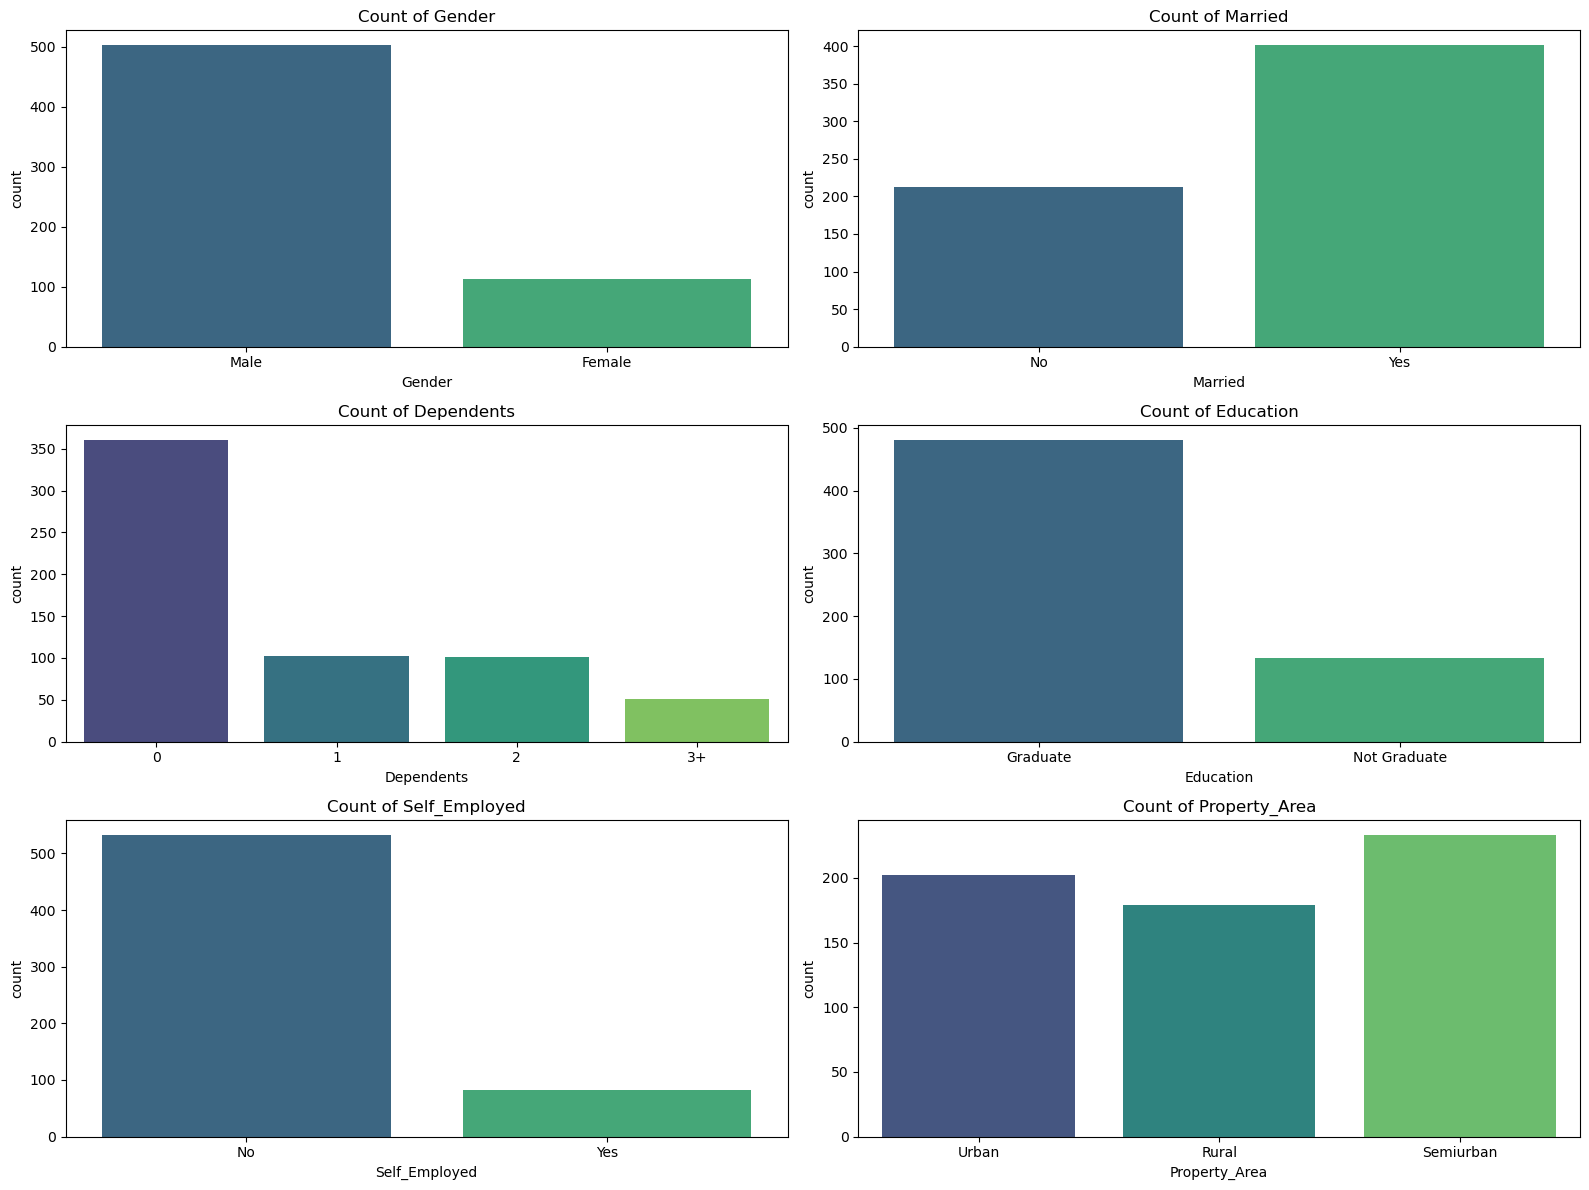

In [18]:
# Univarate analysis of the categorical features

# Plot bar charts for categorical features
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Gender
sns.countplot(x='Gender', data=df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Count of Gender')

# Married
sns.countplot(x='Married', data=df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Count of Married')

# Dependents
sns.countplot(x='Dependents', data=df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Count of Dependents')

# Education
sns.countplot(x='Education', data=df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Count of Education')

# Self_Employed
sns.countplot(x='Self_Employed', data=df, ax=axes[2, 0], palette='viridis')
axes[2, 0].set_title('Count of Self_Employed')

# Property_Area
sns.countplot(x='Property_Area', data=df, ax=axes[2, 1], palette='viridis')
axes[2, 1].set_title('Count of Property_Area')

plt.tight_layout()
plt.show()


The bar charts for categorical features show:

- Gender: The majority of the applicants are male.
- Married: Most applicants are married.
- Dependents: Most applicants have no dependents, with the next largest group having one dependent.
- Education: The majority of the applicants are graduates.
- Self_Employed: Most applicants are not self-employed.
- Property_Area: Most applicants are from semi-urban areas, followed by urban and rural areas.

#### Bivariate analysis

- This involves analyzing the relationship between two variables. E.g exploring the the correlation of the target variable, 'Loan_Status' with other variables

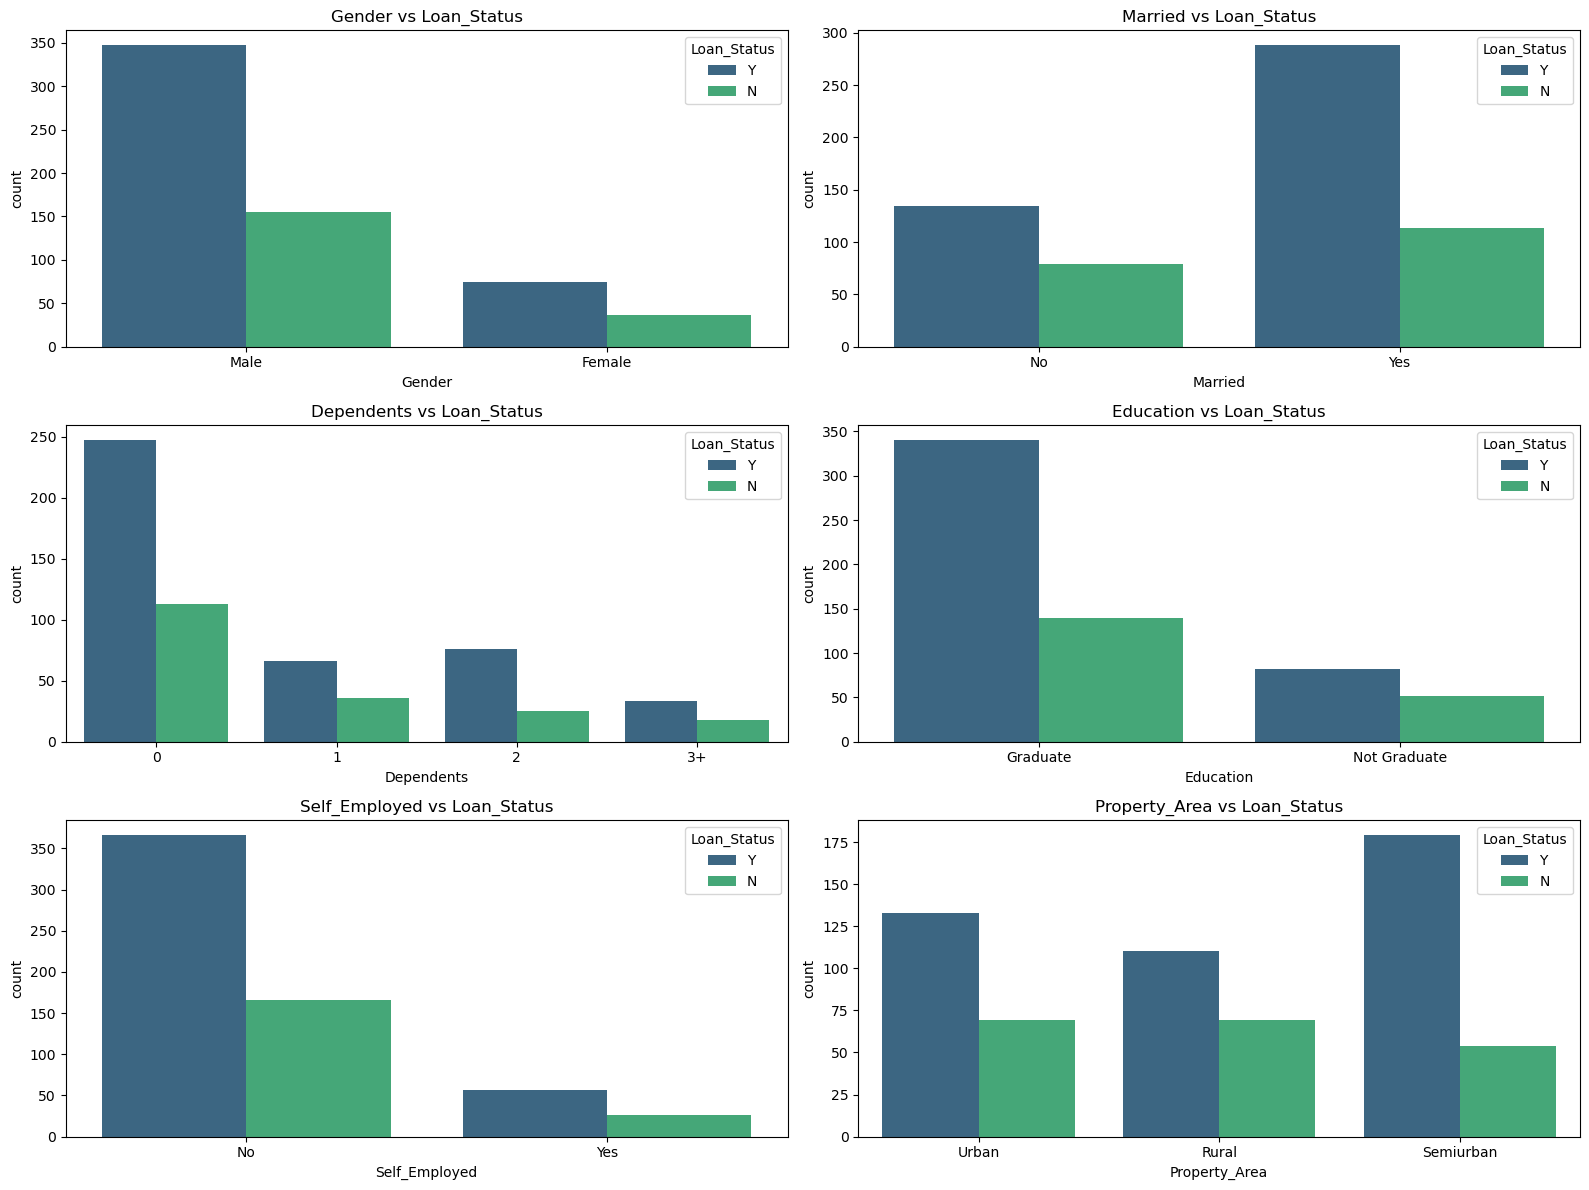

In [19]:
# Plot relationship between categorical features and Loan_Status
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Gender vs Loan_Status
sns.countplot(x='Gender', hue='Loan_Status', data=df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Gender vs Loan_Status')

# Married vs Loan_Status
sns.countplot(x='Married', hue='Loan_Status', data=df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Married vs Loan_Status')

# Dependents vs Loan_Status
sns.countplot(x='Dependents', hue='Loan_Status', data=df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Dependents vs Loan_Status')

# Education vs Loan_Status
sns.countplot(x='Education', hue='Loan_Status', data=df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Education vs Loan_Status')

# Self_Employed vs Loan_Status
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df, ax=axes[2, 0], palette='viridis')
axes[2, 0].set_title('Self_Employed vs Loan_Status')

# Property_Area vs Loan_Status
sns.countplot(x='Property_Area', hue='Loan_Status', data=df, ax=axes[2, 1], palette='viridis')
axes[2, 1].set_title('Property_Area vs Loan_Status')

plt.tight_layout()
plt.show()


#### Let's look at the probability of getting a loan based on some features

In [20]:
# Probability of getting a loan based on Credit_History

temp1 = df['Credit_History'].value_counts(ascending=True)
print('Frequency Table for Credit History:')
print(temp1)

temp2 = df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('\nProbability of getting a loan for each Credit History Class:')
print(temp2)

Frequency Table for Credit History:
Credit_History
0.0     89
1.0    525
Name: count, dtype: int64

Probability of getting a loan for each Credit History Class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.790476


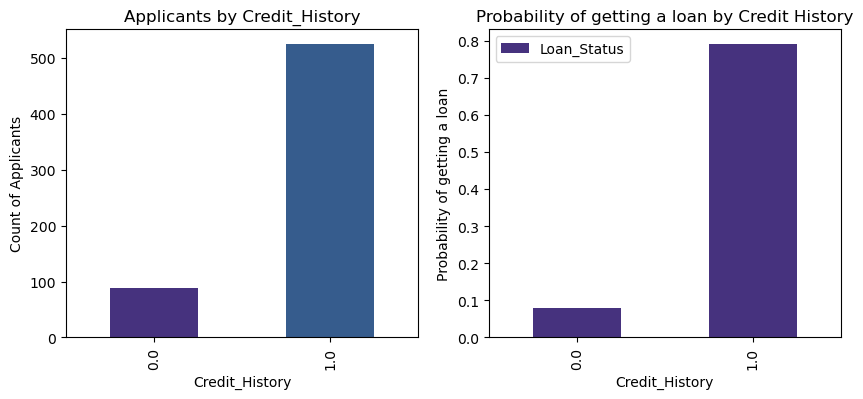

In [21]:
# Visualizing
fig = plt.figure(figsize=(10, 4))

# First chart
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar', ax=ax1, color=viridis_colors)

# probability chart
ax2 = fig.add_subplot(1, 2, 2)
temp2.plot(kind='bar', ax=ax2, color=viridis_colors)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting a loan')
ax2.set_title("Probability of getting a loan by Credit History")

plt.show()


From our chart, we can observe that the probability of getting a loan is eight-fold if the applicant has a valid credit history. This suggests that there is a strong correlation between credit history and the chance of getting a loan

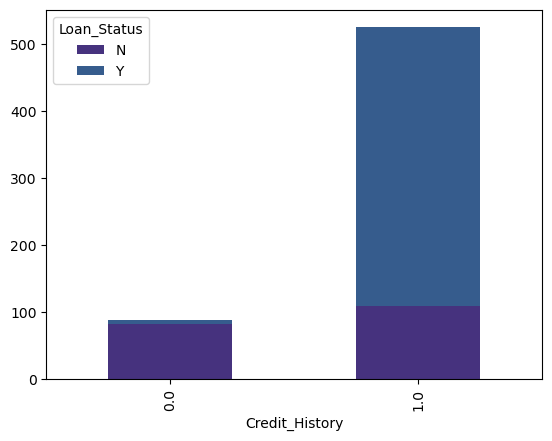

In [22]:
# Loan status based on Credit_History

temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind = 'bar', stacked = True, color=viridis_colors, grid = False)

plt.show()

For most applicants with a Credit History of 1, there loans were approved

In [23]:
# Probability of getting a loan based on Married
temp3 = df['Married'].value_counts(ascending=True)
print('Frequency Table for Married:')
print(temp3)

temp4 = df.pivot_table(values='Loan_Status', index=['Married'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('\nProbability of getting a loan by Married:')
print(temp4)


Frequency Table for Married:
Married
No     213
Yes    401
Name: count, dtype: int64

Probability of getting a loan by Married:
         Loan_Status
Married             
No          0.629108
Yes         0.718204


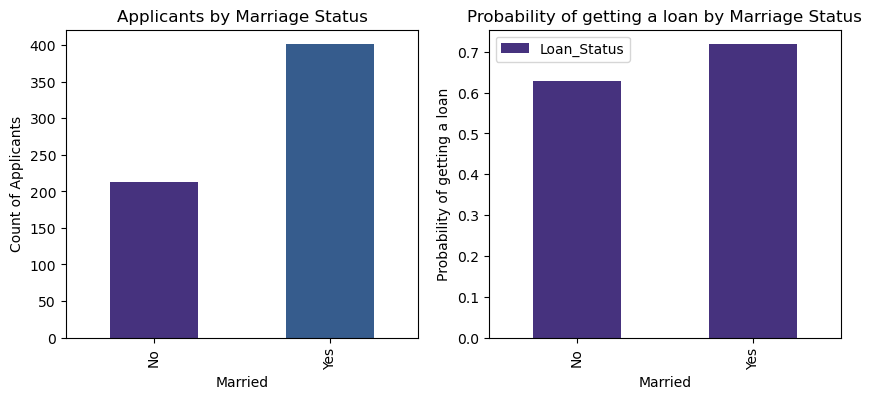

In [24]:
# Visualizing
fig = plt.figure(figsize=(10, 4))

# First chart
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlabel('Married')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Marriage Status")
temp3.plot(kind='bar', ax=ax1, color=viridis_colors)

# Second chart
ax2 = fig.add_subplot(1, 2, 2)
temp4.plot(kind='bar', ax=ax2, color=viridis_colors)
ax2.set_xlabel('Married')
ax2.set_ylabel('Probability of getting a loan')
ax2.set_title("Probability of getting a loan by Marriage Status")

plt.show()

In [25]:
# Probability of getting a loan based on Self-employment status

temp5 = df['Self_Employed'].value_counts(ascending=True)
print('Frequency Table for Self_Employed:')
print(temp5)

temp6 = df.pivot_table(values='Loan_Status', index=['Self_Employed'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('\nProbability of getting a loan based on Self-employment status:')
print(temp6)

Frequency Table for Self_Employed:
Self_Employed
Yes     82
No     532
Name: count, dtype: int64

Probability of getting a loan based on Self-employment status:
               Loan_Status
Self_Employed             
No                0.687970
Yes               0.682927


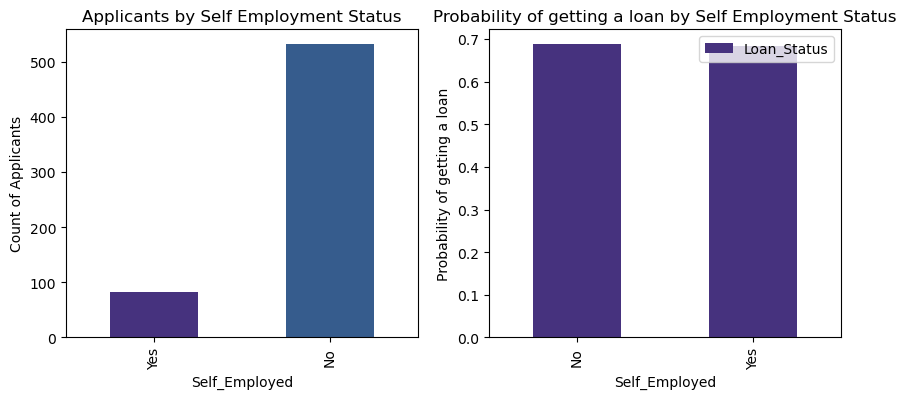

In [26]:
# Visualize

fig = plt.figure(figsize=(10, 4))

# First chart
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlabel('Self_Employed')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Self Employment Status")
temp5.plot(kind='bar', ax=ax1, color=viridis_colors)

# Second chart
ax2 = fig.add_subplot(1, 2, 2)
temp6.plot(kind='bar', ax=ax2, color=viridis_colors)
ax2.set_xlabel('Self_Employed')
ax2.set_ylabel('Probability of getting a loan')
ax2.set_title("Probability of getting a loan by Self Employment Status")

plt.show()

In [27]:
# Probability of getting a loan based on Property_Area
temp7 = df['Property_Area'].value_counts(ascending=True)
print('Frequency Table for Property_Area:')
print(temp7)

temp8 = df.pivot_table(values='Loan_Status', index=['Property_Area'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('\nProbability of getting a loan by Property_Area:')
print(temp8)

Frequency Table for Property_Area:
Property_Area
Rural        179
Urban        202
Semiurban    233
Name: count, dtype: int64

Probability of getting a loan by Property_Area:
               Loan_Status
Property_Area             
Rural             0.614525
Semiurban         0.768240
Urban             0.658416


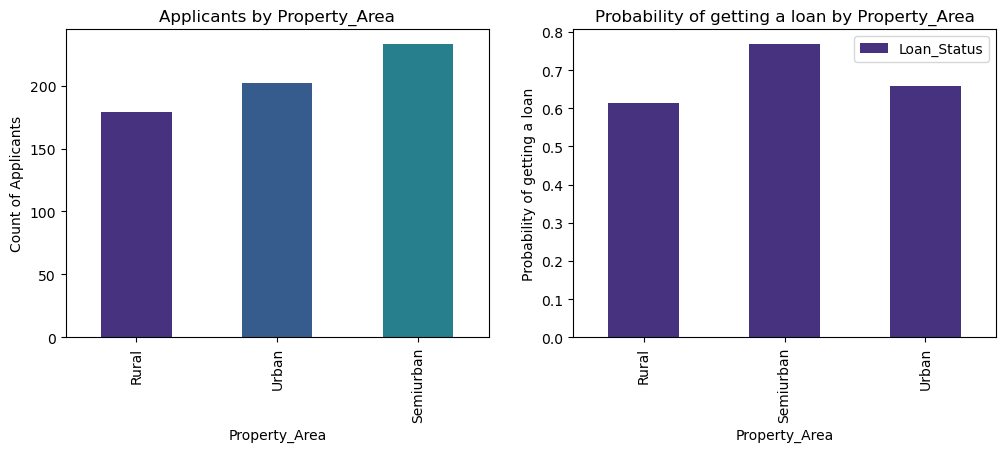

In [28]:
# Visualize

fig = plt.figure(figsize=(12, 4))

# First chart
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlabel('Property_Area')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Property_Area")
temp7.plot(kind='bar', ax=ax1, color=viridis_colors)

# Second chart
ax2 = fig.add_subplot(1, 2, 2)
temp8.plot(kind='bar', ax=ax2, color=viridis_colors)
ax2.set_xlabel('Property_Area')
ax2.set_ylabel('Probability of getting a loan')
ax2.set_title("Probability of getting a loan by Property_Area")

plt.show()

In [29]:
# Probability of getting a loan based on Education

temp9 = df['Education'].value_counts(ascending=True)
print('Frequency Table for Education:')
print(temp9)

temp10 = df.pivot_table(values='Loan_Status', index=['Education'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('\nProbability of getting a loan based on Education:')
print(temp10)

Frequency Table for Education:
Education
Not Graduate    134
Graduate        480
Name: count, dtype: int64

Probability of getting a loan based on Education:
              Loan_Status
Education                
Graduate         0.708333
Not Graduate     0.611940


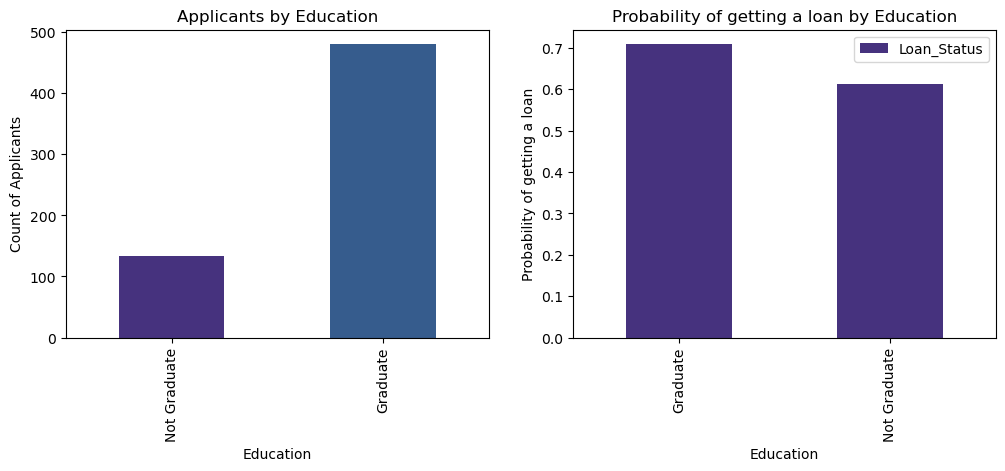

In [30]:
# Visualize

fig = plt.figure(figsize=(12, 4))

# First chart
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlabel('Education')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Education")
temp9.plot(kind='bar', ax=ax1, color=viridis_colors)

# Second chart
ax2 = fig.add_subplot(1, 2, 2)
temp10.plot(kind='bar', ax=ax2, color=viridis_colors)
ax2.set_xlabel('Education')
ax2.set_ylabel('Probability of getting a loan')
ax2.set_title("Probability of getting a loan by Education")

plt.show()

#### Multivariate analysis

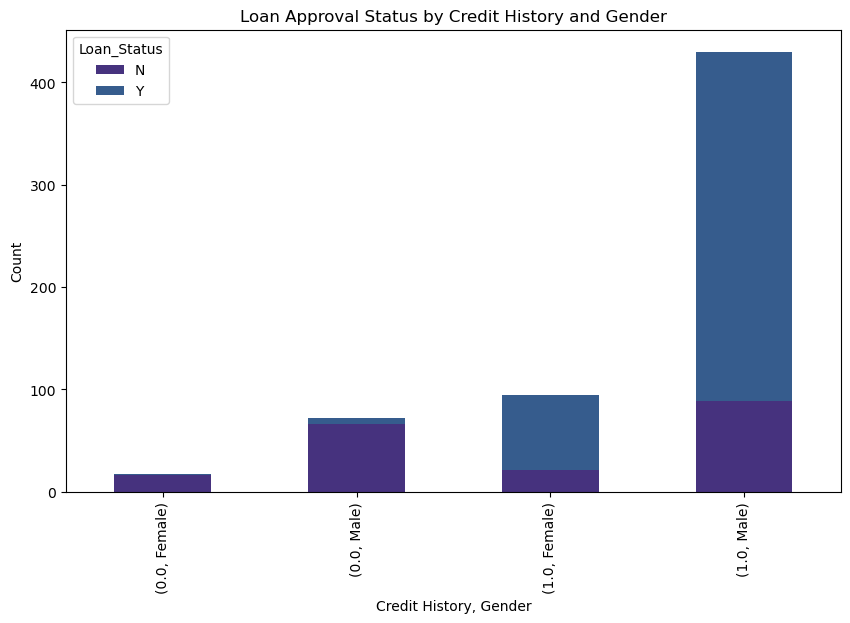

In [31]:
# Considering the Loan_Status by Credit_History and Gender

# Create a cross-tabulation of Credit_History, Loan_Status, and Gender
temp3 = pd.crosstab(index=[df['Credit_History'], df['Gender']], columns=df['Loan_Status'])

# Plot the stacked bar chart with Credit_History, Loan_Status, and Gender
temp3.plot(kind='bar', stacked=True, color=viridis_colors, grid=False, figsize=(10, 6))

# Customize the chart with labels and title
plt.xlabel('Credit History, Gender')
plt.ylabel('Count')
plt.title('Loan Approval Status by Credit History and Gender')

plt.show()


#### Feature Engineering

On ApplicantIncome, one intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income

In [32]:
# Creating a new feature, 'TotalIncome'

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Verify
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0


In [33]:
# Drop ApplicantIncome	CoapplicantIncome columns as we already have TotalIncome

df = df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis = 1)

# Verify
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0


### Building a Machine Learning Predictive Models

Lets convert all our categorical variables into numeric by encoding them

Scaling numerical features using StandardScaler

In [34]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'TotalIncome'],
      dtype='object')

In [35]:

# Define the features and target
features = ['Married', 'Dependents', 'Education', 'Self_Employed', 'TotalIncome',
            'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
target = 'Loan_Status'

# Split the data into dependent and independent features
X = df[features]  # Independent variable
y = df[target]  # Dependent variable

# Encode the target feature
y = LabelEncoder().fit_transform(df[target])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['TotalIncome', 'LoanAmount', 'Loan_Amount_Term']),
        ('cat', OneHotEncoder(), ['Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area'])
    ]
)

# Define the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [36]:
# Step 2: Fit the pipeline with the training data
model_pipeline.fit(X_train, y_train)

# Step 3: Make predictions and evaluate the model
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation with KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_pipeline, X, y, cv=kfold, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.2f}")

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.44      0.57        43
           1       0.76      0.94      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.69      0.70       123
weighted avg       0.77      0.76      0.74       123

Cross-validation scores: [0.77235772 0.82113821 0.81300813 0.76422764 0.80327869]
Mean cross-validation score: 0.79


In [37]:
# Save the model pipeline to a file
joblib_file = 'model_pipeline.pkl'
joblib.dump(model_pipeline, joblib_file)
print(f"Model pipeline saved to {joblib_file}")

# Load the model pipeline from the file
loaded_model_pipeline = joblib.load(joblib_file)
print("Model pipeline loaded successfully")

# Verify the loaded model pipeline
y_pred_loaded = loaded_model_pipeline.predict(X_test)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Accuracy of loaded model: {accuracy_loaded:.2f}")

Model pipeline saved to model_pipeline.pkl
Model pipeline loaded successfully
Accuracy of loaded model: 0.76


#### Model Improvement
- Hyperparameter Tuning

- ##### Random Forest Model

In [38]:
from sklearn.pipeline import Pipeline
# Define the model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Define cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search
rf_grid_search.fit(X_train, y_train)

# Get the best model
best_rf = rf_grid_search.best_estimator_

# Save the best model
joblib.dump(best_rf, 'best_rf_model_pipeline.pkl')

# Evaluate the model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Random Forest: {accuracy:.2f}")
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred))

# Cross-validation with KFold
cv_scores = cross_val_score(rf_pipeline, X, y, cv=kfold, scoring='accuracy')
print(f"Cross-validation scores for Random Forest: {cv_scores}")
print(f"Mean cross-validation score for Random Forest: {cv_scores.mean():.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Accuracy for Random Forest: 0.79
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Cross-validation scores for Random Forest: [0.77235772 0.82113821 0.81300813 0.76422764 0.80327869]
Mean cross-validation score for Random Forest: 0.79
